## O PNAD é Pesquisa Nacional por Amostra de Domicilios realizada pelo IBGE. Faça o download (https://www.kaggle.com/upadorprofzs/simple-exploratory-analysis-pinad-br/data ) dos MICRODADOS e realize uma análise descritiva de dados em Python para responder as perguntas abaixo:

1. Existe diferença entre a renda da população masculina e feminina?
2. Qual a altura média da população brasileira?
3. A renda é maior para quem tem mais escolaridade?
4. Quais estados possuem o maior e menor índice de escolaridade respectivamente?


In [1]:
!pip install geopandas

In [2]:
#Importando os módulos necessários para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px

In [3]:
#Importando base de dados
dados = pd.read_csv('dados.csv')

In [4]:
#Visualizando dados
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
dados['UF'] == 53

0        False
1        False
2        False
3        False
4        False
         ...  
76835     True
76836     True
76837     True
76838     True
76839     True
Name: UF, Length: 76840, dtype: bool

In [6]:
#Verificando os tipos de dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


<Axes: >

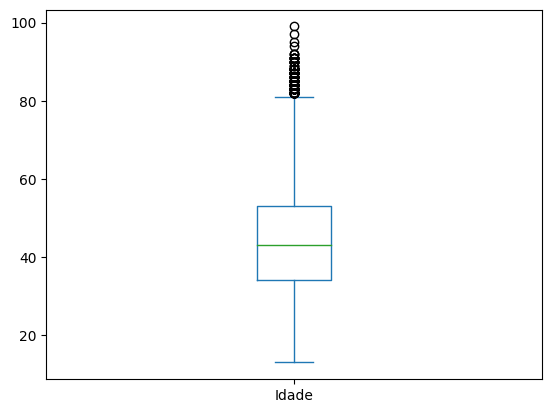

In [7]:
#Verificando se Existem Algum tipo de valor discrepante na coluna idade
dados['Idade'].plot.box()

In [8]:
#Analisando a média de renda comparada a coluna Sexo
diferenca_renda_por_sexo = dados.groupby('Sexo')['Renda'].mean().reset_index()

In [9]:
#Verificando o resultado
diferenca_renda_por_sexo

,Sexo,Renda
0,0,2192.441596
1,1,1566.847393


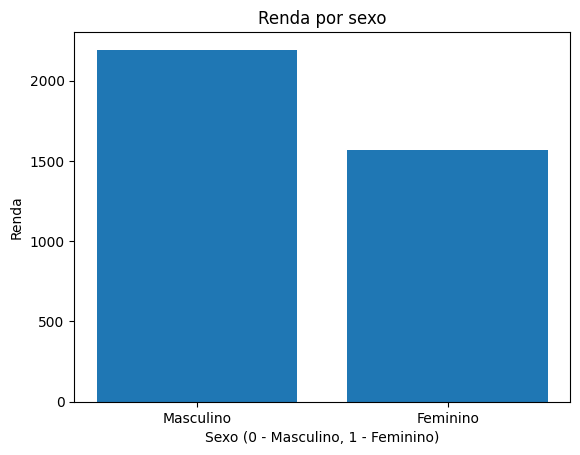

In [10]:
#Criando visualização para análise de renda média por sexo
valores_sexo = [0, 1]
sexo = ['Masculino', 'Feminino']
plt.bar(diferenca_renda_por_sexo['Sexo'], diferenca_renda_por_sexo['Renda'])
plt.title('Renda por sexo')
plt.xlabel('Sexo (0 - Masculino, 1 - Feminino)')
plt.ylabel('Renda')

# Definindo os rótulos no eixo x
plt.xticks(valores_sexo, sexo)

plt.show()

In [11]:
#Analisando Renda média sob a perspectiva de anos de estudo
renda_por_anos_estudo = dados.groupby('Anos de Estudo')['Renda'].mean().reset_index()

In [12]:
#Visualizando resultado da análise de renda média por anos de estudo
fig_renda_por_anos_estudo = px.line(renda_por_anos_estudo,
                                     x='Anos de Estudo',
                                     y='Renda',
                                     markers=True,  # Mostra marcadores
                                     title='Renda Média X Anos de Estudo')

# Personalizando o layout do gráfico
fig_renda_por_anos_estudo.update_layout(
    yaxis_title='Renda Média'  # Título do eixo y
)
fig_renda_por_anos_estudo.show()

In [13]:
#Função que transforma valores da coluna UF em sigla dos estados respectivos. De acordo com a legenda fornecida nos dados pelo site kagle
def transcreve_estad_sigla(estado):
    if estado == 11:
        return 'RO'
    elif estado == 12:
        return 'AC'
    elif estado == 13:
        return 'AM'
    elif estado == 14:
        return 'RR'
    elif estado == 15:
        return 'PA'
    elif estado == 16:
        return 'AP'
    elif estado == 17:
        return 'TO'
    elif estado == 21:
        return 'MA'
    elif estado == 22:
        return 'PI'
    elif estado == 23:
        return 'CE'
    elif estado == 24:
        return 'RN'
    elif estado == 25:
        return 'PB'
    elif estado == 26:
        return 'PE'
    elif estado == 27:
        return 'AL'
    elif estado == 28:
        return 'SE'
    elif estado == 29:
        return 'BA'
    elif estado == 31:
        return 'MG'
    elif estado == 32:
        return 'ES'
    elif estado == 33:
        return 'RJ'
    elif estado == 35:
        return 'SP'
    elif estado == 41:
        return 'PR'
    elif estado == 42:
        return 'SC'
    elif estado == 43:
        return 'RS'
    elif estado == 50:
        return 'MS'
    elif estado == 51:
        return 'MT'
    elif estado == 52:
        return 'GO'
    elif estado == 53:
        return 'DF'
    else:
        return 'Estado Desconhecido'


In [14]:
dados['Estado'] = dados['UF'].apply(lambda x: transcreve_estad_sigla(x))

In [15]:
#Função que transforma valores da coluna UF em nome dos estados respectivos. De acordo com a legenda fornecida nos dados pelo site kagle.
#A função foi criada para que seja possível obter a latitude e longitude dos estados a partir da biblioteca geopandas, para plotar um gráfico de mapa com a renda média por estado
def transcreve_estado_nome_completo(estado):
    if estado == 11:
        return 'Rondônia, Brasil'
    elif estado == 12:
        return 'Acre, Brasil'
    elif estado == 13:
        return 'Amazonas, Brasil'
    elif estado == 14:
        return 'Roraima, Brasil'
    elif estado == 15:
        return 'Pará, Brasil'
    elif estado == 16:
        return 'Amapá, Brasil'
    elif estado == 17:
        return 'Tocantins, Brasil'
    elif estado == 21:
        return 'Maranhão, Brasil'
    elif estado == 22:
        return 'Piauí, Brasil'
    elif estado == 23:
        return 'Ceará, Brasil'
    elif estado == 24:
        return 'Rio Grande do Norte, Brasil'
    elif estado == 25:
        return 'Paraíba, Brasil'
    elif estado == 26:
        return 'Pernambuco, Brasil'
    elif estado == 27:
        return 'Alagoas, Brasil'
    elif estado == 28:
        return 'Sergipe, Brasil'
    elif estado == 29:
        return 'Bahia, Brasil'
    elif estado == 31:
        return 'Minas Gerais, Brasil'
    elif estado == 32:
        return 'Espírito Santo, Brasil'
    elif estado == 33:
        return 'Rio de Janeiro, Brasil'
    elif estado == 35:
        return 'São Paulo, Brasil'
    elif estado == 41:
        return 'Paraná, Brasil'
    elif estado == 42:
        return 'Santa Catarina, Brasil'
    elif estado == 43:
        return 'Rio Grande do Sul, Brasil'
    elif estado == 50:
        return 'Mato Grosso do Sul, Brasil'
    elif estado == 51:
        return 'Mato Grosso, Brasil'
    elif estado == 52:
        return 'Goiás, Brasil'
    elif estado == 53:
        return 'Distrito Federal, Brasil'
    else:
        return 'Estado Desconhecido'
#Aplicando função para todas as linhas
dados['Estado_completo'] = dados['UF'].apply(lambda x: transcreve_estado_nome_completo(x))

In [16]:
#Separando todos os estados que existem na base para oberte as coordenadas
estados = {}
estados['Estado_completo'] = dados['Estado_completo'].value_counts().keys()
estados['Estado'] = dados['Estado'].value_counts().keys()
estados = pd.DataFrame(estados)
estados

,Estado_completo,Estado
0,"São Paulo, Brasil",SP
1,"Minas Gerais, Brasil",MG
2,"Rio Grande do Sul, Brasil",RS
3,"Bahia, Brasil",BA
4,"Rio de Janeiro, Brasil",RJ
5,"Pará, Brasil",PA
6,"Paraná, Brasil",PR
7,"Pernambuco, Brasil",PE
8,"Goiás, Brasil",GO
9,"Ceará, Brasil",CE


In [17]:
#Função quera latitude e longitude de cada estado e retorna as colunas necessárias.
def gera_latitude_longitude(df):
    gdf = gpd.tools.geocode(df['Estado_completo'], provider='nominatim', user_agent='my-application2', timeout=10)
    df['latitude'] = gdf.geometry.y
    df['longitude'] = gdf.geometry.x
    return df[['Estado','Estado_completo', 'latitude', 'longitude']]

In [18]:
#Aplicando a função criada
lat_lon = gera_latitude_longitude(estados)

In [19]:
#Visualizando latitude e longitude
lat_lon

,Estado,Estado_completo,latitude,longitude
0,SP,"São Paulo, Brasil",-1.204322,-47.158394
1,MG,"Minas Gerais, Brasil",-18.526484,-44.158865
2,RS,"Rio Grande do Sul, Brasil",-29.842528,-53.768058
3,BA,"Bahia, Brasil",-12.285251,-41.929478
4,RJ,"Rio de Janeiro, Brasil",-22.911014,-43.209373
5,PA,"Pará, Brasil",-4.749393,-52.897301
6,PR,"Paraná, Brasil",-24.484219,-51.814887
7,PE,"Pernambuco, Brasil",-8.411632,-37.591970
8,GO,"Goiás, Brasil",-15.932366,-50.139293
9,CE,"Ceará, Brasil",-5.326470,-39.715607


In [20]:
#Analisando Renda média por estado
renda_por_estado = dados.groupby('Estado')['Renda'].mean().reset_index()


renda_por_estado.columns = ['Estado', 'Renda']

#Fazendo junção de DataFrame renda_por_estado que possui a informação de renda com o DataFrame lat_lon que possui as coordenadas necessárias para plotar o gráfico de mapa
renda_por_estado_df = pd.merge(renda_por_estado, lat_lon, on='Estado')

renda_por_estado_df

,Estado,Renda,Estado_completo,latitude,longitude
0,AC,1506.091782,"Acre, Brasil",-9.047868,-70.526498
1,AL,1144.552602,"Alagoas, Brasil",-9.661166,-36.650243
2,AM,1445.130100,"Amazonas, Brasil",-4.479925,-63.518540
3,AP,1861.353516,"Amapá, Brasil",1.354544,-51.916198
4,BA,1429.645094,"Bahia, Brasil",-12.285251,-41.929478
5,CE,1255.403692,"Ceará, Brasil",-5.326470,-39.715607
6,DF,4241.954722,"Distrito Federal, Brasil",-15.775446,-47.797089
7,ES,2026.383852,"Espírito Santo, Brasil",-19.568768,-40.172199
8,GO,1994.580794,"Goiás, Brasil",-15.932366,-50.139293
9,MA,1019.432009,"Maranhão, Brasil",-5.208550,-45.393026


In [21]:
#Visualizando gráfico de mapa
fig_mapa_renda_media_por_estado = px.scatter_geo(renda_por_estado_df,
                                           lat='latitude',
                                           lon='longitude',
                                           scope='south america',
                                           size='Renda',
                                           template='seaborn',
                                           hover_name='Estado',
                                           hover_data={'latitude': False, 'longitude': False},
                                           title='Renda Média X Estado'
                                          )
fig_mapa_renda_media_por_estado.show()

In [22]:
# Tabela de renda média de faixa etária

# 1 CRIANDO A LISTAGEM PARA O DAS IDADES

coluna_idade = 'Idade'
faixas_etarias = {
    'Grupo': ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    'Frequencia': [0, 0, 0, 0, 0, 0]
}
faixas_etarias = [18, 25, 35, 45, 55, 65, float('inf')]

# Criando as faixas etárias automaticamente
faixas_etarias_rotulos = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
dados['faixa_etaria'] = pd.cut(dados[coluna_idade], bins=faixas_etarias, labels=faixas_etarias_rotulos, right=False)
dados
renda_por_faixa_etaria =  dados.groupby('faixa_etaria')['Renda'].mean().reset_index()
renda_por_faixa_etaria

,faixa_etaria,Renda
0,18-24,1149.890992
1,25-34,1814.845432
2,35-44,2050.255987
3,45-54,2213.049598
4,55-64,2095.238700
5,65+,1856.341277


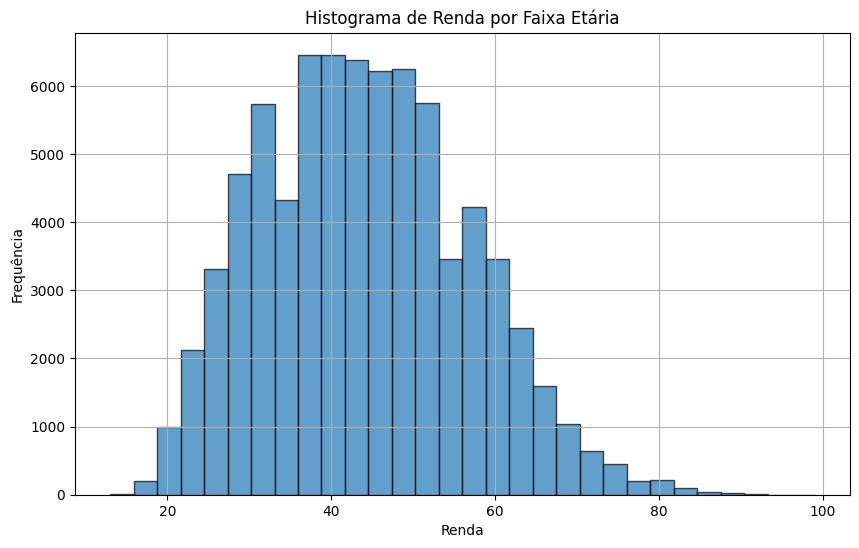

In [23]:
#Visualizando renda média por faixa etária
plt.figure(figsize=(10, 6))
plt.hist(dados['Idade'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de Renda por Faixa Etária')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()